## Tratamento dos dados

#### Importação das bibliotecas

In [1]:
import pandas as pd
import os
from graph_tool import Graph, stats
from netpixi.data.gt import *
import netpixi

#### Ligas disponíveis

O dataset de transferências possui os dados das seguintes ligas:

#### Problemas:

- Sub21 e Sub18
DATA_DIR = './data/transfers_master/data'- Incoerência entre as colunas club_name e club_involved_name

In [2]:
DATA_DIR = './data/transfers_master/data'
os.listdir(DATA_DIR + '/' + '2014')

['spanish_primera_division.csv',
 'dutch_eredivisie.csv',
 'portugese_liga_nos.csv',
 'french_ligue_1.csv',
 'italian_serie_a.csv',
 'russian_premier_liga.csv',
 'english_premier_league.csv',
 'english_championship.csv',
 'german_bundesliga_1.csv']

#### Loading Data

Função para carregar o dataset. Recebe o diretório que o data está salvo e o ano.

In [3]:
def loading_data(DATA_DIR, year):
    
    # Leitura do primeiro dataset para carregar as columns
    dir = "./data/transfers_master/data/"+ year + "/dutch_eredivisie.csv"
    data = pd.read_csv(dir)

    # Loop desconsidera o primeiro elemento (carregado no código acima)
    for league in os.listdir(DATA_DIR + '/' + year)[1:]:
            string = (DATA_DIR + '/' + year + '/' + league)
            data_temp = pd.read_csv(string)
            
            # Concatenação dos dados
            data = pd.concat([data, data_temp])
     
    return(data)

def concat_year(start, end, DATA_DIR, data):
    
    for year in range(start, end+1):
        data = pd.concat([data, loading_data(DATA_DIR, str(year))])
        
    return data

In [4]:
DATA_DIR = './data/transfers_master/data'
YEAR = '1992'

data = loading_data(DATA_DIR, YEAR)
data

,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
0,Fortuna Sittard,René Hofman,31.0,Right Winger,Roda JC,?,in,Summer,NaN,Eredivisie,1992,1992/1993
1,Fortuna Sittard,Peter Schmitz,21.0,Forward,Helmond Sport,?,in,Summer,NaN,Eredivisie,1992,1992/1993
2,Fortuna Sittard,Kenneth Nysaether,22.0,Centre-Forward,Lillestrøm SK,?,in,Summer,NaN,Eredivisie,1992,1992/1993
3,Fortuna Sittard,Arno van Zwam,22.0,Goalkeeper,Fortuna U19,-,in,Summer,0.00,Eredivisie,1992,1992/1993
4,Fortuna Sittard,Jerry Taihuttu,22.0,Centre-Forward,Helmond Sport,Loan,out,Summer,0.00,Eredivisie,1992,1992/1993
...,...,...,...,...,...,...,...,...,...,...,...,...
271,1.FC Nuremberg,Percy Olivares,24.0,Left-Back,Sport. Cristal,Free transfer,out,Winter,0.00,1 Bundesliga,1992,1992/1993
272,1. FC Köln,Andrzej Kobylanski,22.0,Left Midfield,Siarka T.,£270Th.,in,Winter,0.27,1 Bundesliga,1992,1992/1993
273,1.FC Kaiserslautern,Bernhard Winkler,26.0,Centre-Forward,SC Fortuna Köln,Loan,out,Winter,0.00,1 Bundesliga,1992,1992/1993
274,SG Dynamo Dresden,Nikica Maglica,27.0,Forward,NK Zagreb,?,in,Winter,NaN,1 Bundesliga,1992,1992/1993


In [5]:
data = concat_year(1993, 2015, DATA_DIR, data)

In [6]:
data_in = data.loc[data["transfer_movement"] == "in"]
data_out = data.loc[data["transfer_movement"] == "out"]
data_in = data_in.reset_index()
data_out = data_out.reset_index()

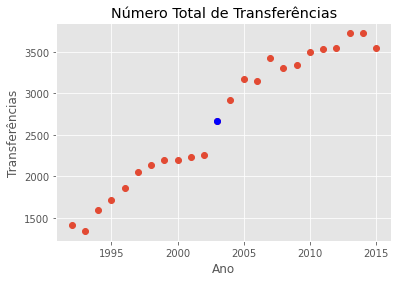

In [7]:
import matplotlib.pyplot as plt

pl = data_in["year"].value_counts()
pre_gal = pl.sort_index()
pos_gal = pl.sort_index()
pre_gal = pre_gal[:11]
pos_gal = pos_gal[11:]

plt.style.use('ggplot')
plt.title("Número Total de Transferências")
plt.xlabel("Ano")
plt.ylabel("Transferências")
plt.plot(pl.sort_index(), 'o', label = "Transferências")
plt.plot(2003 ,pl[2003], 'bo', label = "Era")

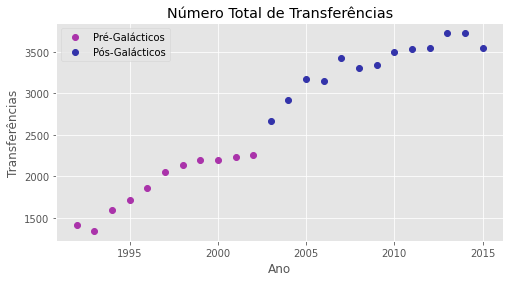

In [8]:
plt.figure(figsize = (8,4))
plt.plot(pre_gal, 'o', label = "Pré-Galácticos", color = "#AA33AA")
plt.plot(pos_gal, 'o', label = "Pós-Galácticos", color = "#3333AA")
plt.title("Número Total de Transferências")
plt.xlabel("Ano")
plt.ylabel("Transferências")
plt.legend(loc="upper left")
plt.show()

In [9]:
in_names = list(data_in["club_name"].value_counts().index)
out_names = list(data_in["club_involved_name"].value_counts().index)
name_dic = {}
problems = ["Olympique Marseille", "Olympique Lyon", "Eintracht Braunschweig", "Eintracht Frankfurt"]
for in_str in in_names:
    for out_str in out_names:

        if out_str[:10] in in_str and out_str != in_str:
            if (out_str not in problems) or (in_str not in problems):
                print(in_str ,", ", out_str)
                name_dic[out_str] = in_str

Feyenoord Rotterdam ,  Feyenoord
Feyenoord Rotterdam ,  Feyenoord U19
Feyenoord Rotterdam ,  Feyenoord U21
Feyenoord Rotterdam ,  Feyenoord U18
Feyenoord Rotterdam ,  Feyenoord U17
Blackburn Rovers ,  Blackburn
Blackburn Rovers ,  Blackburn U18
Blackburn Rovers ,  Blackburn U21
SC Heerenveen ,  Heerenveen
SC Heerenveen ,  Heerenveen U19
SC Heerenveen ,  Heerenveen U21
PSV Eindhoven ,  Eindhoven
SL Benfica ,  Benfica
Ajax Amsterdam ,  Ajax
Derby County ,  Derby
Middlesbrough FC ,  Middlesbrough
Queens Park Rangers ,  Rangers
Leeds United ,  Leeds
Birmingham City ,  Birmingham
Birmingham City ,  Birmingham U18
Birmingham City ,  Birmingham U23
Vitesse Arnhem ,  Vitesse
FC Utrecht ,  FC Utrecht U19
Charlton Athletic ,  Charlton
Charlton Athletic ,  Athletic
Fulham FC ,  Fulham
Willem II Tilburg ,  Willem II
Willem II Tilburg ,  Willem II U21
Willem II Tilburg ,  Willem II U19
Tottenham Hotspur ,  Tottenham U18
Tottenham Hotspur ,  Tottenham U21
FC Groningen ,  FC Groning. U21
Sheffield We

In [10]:
for k,v in name_dic.items():
    data_in["club_involved_name"].replace({k: v}, inplace=True)
    
data_in

,index,club_name,player_name,age,position,club_involved_name,fee,transfer_movement,transfer_period,fee_cleaned,league_name,year,season
0,0,Fortuna Sittard,René Hofman,31.0,Right Winger,Roda JC Kerkrade,?,in,Summer,NaN,Eredivisie,1992,1992/1993
1,1,Fortuna Sittard,Peter Schmitz,21.0,Forward,Helmond Sport,?,in,Summer,NaN,Eredivisie,1992,1992/1993
2,2,Fortuna Sittard,Kenneth Nysaether,22.0,Centre-Forward,Lillestrøm SK,?,in,Summer,NaN,Eredivisie,1992,1992/1993
3,3,Fortuna Sittard,Arno van Zwam,22.0,Goalkeeper,Fortuna U19,-,in,Summer,0.00,Eredivisie,1992,1992/1993
4,8,Dordrecht'90,Michel Langerak,23.0,Attacking Midfield,VVV-Venlo,?,in,Summer,NaN,Eredivisie,1992,1992/1993
...,...,...,...,...,...,...,...,...,...,...,...,...,...
64570,562,Hamburger SV,Josip Drmic,23.0,Centre-Forward,Bor. M'gladbach,Loan fee:£1.08m,in,Winter,1.08,1 Bundesliga,2015,2015/2016
64571,563,Hamburger SV,Nabil Bahoui,24.0,Left Winger,Ahli,Free transfer,in,Winter,0.00,1 Bundesliga,2015,2015/2016
64572,564,Hamburger SV,Dren Feka,18.0,Defensive Midfield,Hamburger SV,-,in,Winter,0.00,1 Bundesliga,2015,2015/2016
64573,568,FC Ingolstadt 04,Darío Lezcano,25.0,Centre-Forward,FC Luzern,£2.25m,in,Winter,2.25,1 Bundesliga,2015,2015/2016


In [11]:
data_in["year"].value_counts()

2013    3726
2014    3724
2012    3554
2015    3547
2011    3541
2010    3494
2007    3428
2009    3343
2008    3305
2005    3175
2006    3154
2004    2926
2003    2663
2002    2256
2001    2240
2000    2194
1999    2193
1998    2137
1997    2051
1996    1857
1995    1718
1994    1593
1992    1413
1993    1343
Name: year, dtype: int64

In [12]:
data_pre_gal = data_in[data_in["year"] <= 2003]
data_pos_gal =  data_in[data_in["year"] > 2003]

In [13]:
g = Graph(directed=True) # dirigido
g.vp['name'] = g.new_vp('object')

In [14]:
times = []
for index, rows in data_pre_gal.iterrows():
    time1 = rows[1]
    time2 = rows[5]
    if time1 not in times:
        times.append(time1)
        g.add_vertex()
        v_time = g.vertex(times.index(time1))
        g.vp['name'][v_time] = time1
        
    if time2 not in times:
        times.append(time2)
        g.add_vertex()
        v_time = g.vertex(times.index(time2))
        g.vp['name'][v_time] = time2
    
    index1 = times.index(time1)
    index2 = times.index(time2)
    
    if g.edge(index1, index2) == None:
        g.add_edge(index1, index2)

In [15]:
stats.remove_self_loops(g)
m = draw_gt.sfdp_layout(g)
move_gt(g, m)
save_gt(g, 'exemplo2.net.gz')

In [23]:
r = netpixi.render('exemplo2.net.gz')

In [24]:
# mudar a cor de fundo do grafo
r.graph(color=0xffffff)

# mudar a cor e o tamanho dos vértices
r.vertex_default(color=0x7E3C6B, size=10)

# mudar a cor, a espessura e a curvatura das arestas
r.edge_default(color=0x000000, width=1, curve1=0, curve2=0)
r.vertex_set_key('name')

In [18]:
g2 = Graph(directed=True) # dirigido
g2.vp['name'] = g2.new_vp('object')

In [19]:
times = []
for index, rows in data_pos_gal.iterrows():
    time1 = rows[1]
    time2 = rows[5]
    if time1 not in times:
        times.append(time1)
        g2.add_vertex()
        v_time = g2.vertex(times.index(time1))
        g2.vp['name'][v_time] = time1
        
    if time2 not in times:
        times.append(time2)
        g2.add_vertex()
        v_time = g2.vertex(times.index(time2))
        g2.vp['name'][v_time] = time2
    
    index1 = times.index(time1)
    index2 = times.index(time2)
    
    if g2.edge(index1, index2) == None:
        g2.add_edge(index1, index2)

In [20]:
stats.remove_self_loops(g2)
m = draw_gt.sfdp_layout(g2)
move_gt(g2, m)
save_gt(g2, 'exemplo3.net.gz')

In [21]:
r2 = netpixi.render('exemplo3.net.gz')

In [22]:
# mudar a cor de fundo do grafo
r2.graph(color=0xffffff)

# mudar a cor e o tamanho dos vértices
r2.vertex_default(color=0x7E3C6B, size=10)

# mudar a cor, a espessura e a curvatura das arestas
r2.edge_default(color=0x000000, width=1, curve1=0, curve2=0)
r2.vertex_set_key('name')